In [19]:
import os
import numpy as np
import matplotlib.pyplot as plt
import datetime

train_data = '../data/train.csv'
test_data = '../data/test.csv'
log_path = '../results/'

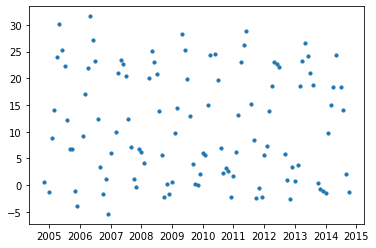

In [20]:
f = open(train_data, 'r')
x, x_mon, x_yr, y = [], [], [], []

for line in f.readlines()[1:]:
    nums = line.strip().split(',')
    x.append('/'.join(nums[0].split('/')))
    x_mon.append(int(nums[0].split('/')[0]))
    x_yr.append(int(nums[0].split('/')[2]))
    y.append(float(nums[1]))
f.close()

x = [datetime.datetime.strptime(d,"%m/%d/%y").date() for d in x]
plt.scatter(x,y,s=10)
plt.show()

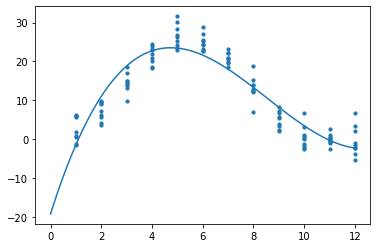

In [26]:
wt = np.array([-19.25256545, 20.69835935, -3.02227315, 0.1179331])
x = np.linspace(0,12,100)
deg = len(wt)
f = np.matmul(x.reshape(-1,1).repeat(deg, 1)**np.arange(deg).reshape(1,-1), wt)

plt.plot(x,f)
plt.scatter(x_mon,y,s=10)
plt.show()

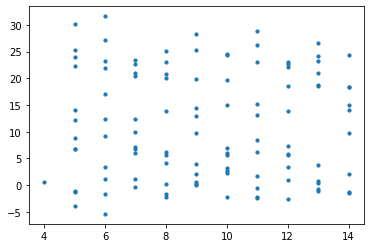

In [22]:
plt.scatter(x_yr, y,s=10)
plt.show()

In [25]:
t=[[]]*12
t[0].append(2)
t

[[2], [2], [2], [2], [2], [2], [2], [2], [2], [2], [2], [2]]